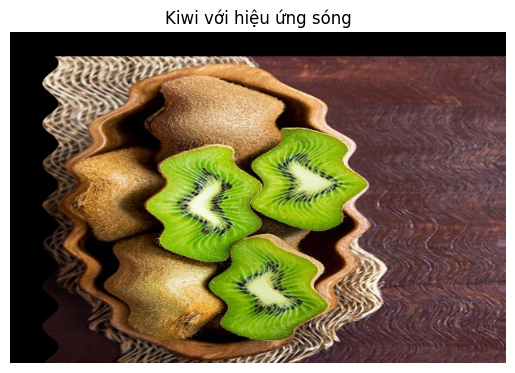

In [1]:
import numpy as np
from scipy.ndimage import map_coordinates
import imageio.v2 as iio
import matplotlib.pyplot as plt


img = iio.imread('kiwi.jpg')  
h, w, c = img.shape

translated = np.zeros_like(img)
y_offset, x_offset = 30, 50
translated[y_offset:h, x_offset:w] = img[0:h - y_offset, 0:w - x_offset]


yy, xx = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')


wave = 10 * np.sin(2 * np.pi * yy / 50)  
xx_wave = xx + wave


xx_wave = np.clip(xx_wave, 0, w - 1)


result = np.zeros_like(img)
for i in range(3): 
    result[..., i] = map_coordinates(translated[..., i], [yy, xx_wave], order=1, mode='reflect')


iio.imwrite('kiwi_wave.jpg', result)


plt.imshow(result)
plt.title("Kiwi với hiệu ứng sóng")
plt.axis('off')
plt.show()


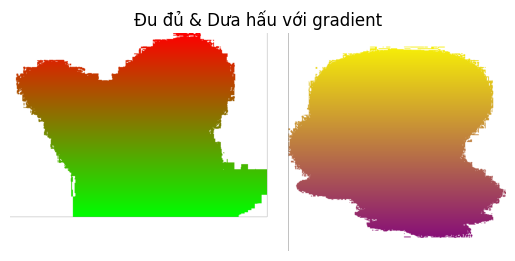

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_gradient(image, start_color, end_color):
    """
    Áp dụng màu gradient theo chiều dọc từ start_color đến end_color
    """
    h, w, _ = image.shape
    gradient = np.linspace(start_color, end_color, h).astype(np.uint8)
    gradient = np.tile(gradient[:, np.newaxis, :], (1, w, 1))
    
    mask = np.any(image != [255, 255, 255], axis=-1).astype(np.uint8)  
    mask_3ch = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

    result = gradient * mask_3ch + image * (1 - mask_3ch)
    return result.astype(np.uint8)


papaya = np.array(Image.open('du_du.jpg').convert('RGB'))
watermelon = np.array(Image.open('dua_hau.jpg').convert('RGB'))


papaya_colored = apply_gradient(papaya, start_color=[255, 0, 0], end_color=[0, 255, 0])


watermelon_colored = apply_gradient(watermelon, start_color=[255, 255, 0], end_color=[128, 0, 128])


canvas_h = max(papaya_colored.shape[0], watermelon_colored.shape[0])
canvas_w = papaya_colored.shape[1] + watermelon_colored.shape[1] + 50  
canvas = np.zeros((canvas_h, canvas_w, 4), dtype=np.uint8)  


papaya_rgba = np.concatenate([papaya_colored, np.full((papaya_colored.shape[0], papaya_colored.shape[1], 1), 255)], axis=-1)
canvas[:papaya_colored.shape[0], :papaya_colored.shape[1], :] = papaya_rgba


x_offset = papaya_colored.shape[1] + 50
watermelon_rgba = np.concatenate([watermelon_colored, np.full((watermelon_colored.shape[0], watermelon_colored.shape[1], 1), 255)], axis=-1)
canvas[:watermelon_colored.shape[0], x_offset:x_offset + watermelon_colored.shape[1], :] = watermelon_rgba


Image.fromarray(canvas).save('fruit_composite.png', 'PNG')


plt.imshow(canvas)
plt.axis('off')
plt.title("Đu đủ & Dưa hấu với gradient")
plt.show()


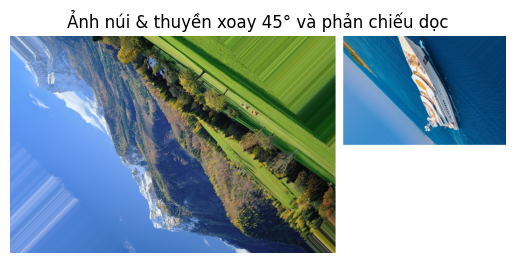

In [ ]:
import numpy as np
from PIL import Image
from scipy.ndimage import rotate
import matplotlib.pyplot as plt

def load_and_rotate(image_path, angle):
    img = np.array(Image.open(image_path).convert('RGB'))
    rotated = rotate(img, angle=angle, reshape=False, mode='nearest')
    return rotated.astype(np.uint8)

def vertical_mirror(image):
    return np.flipud(image)  


mountain = load_and_rotate('mountain.jpg', 45)
boat = load_and_rotate('boat.jpg', 45)


mountain_mirror = vertical_mirror(mountain)
boat_mirror = vertical_mirror(boat)



h = max(mountain_mirror.shape[0], boat_mirror.shape[0])
w = mountain_mirror.shape[1] + boat_mirror.shape[1] + 30  

canvas = np.ones((h, w, 3), dtype=np.uint8) * 255  


canvas[:mountain_mirror.shape[0], :mountain_mirror.shape[1], :] = mountain_mirror


x_offset = mountain_mirror.shape[1] + 30
canvas[:boat_mirror.shape[0], x_offset:x_offset + boat_mirror.shape[1], :] = boat_mirror


Image.fromarray(canvas).save('mountain_boat_mirror.jpg')


plt.imshow(canvas)
plt.title("Ảnh núi & thuyền xoay 45° và phản chiếu dọc")
plt.axis('off')
plt.show()


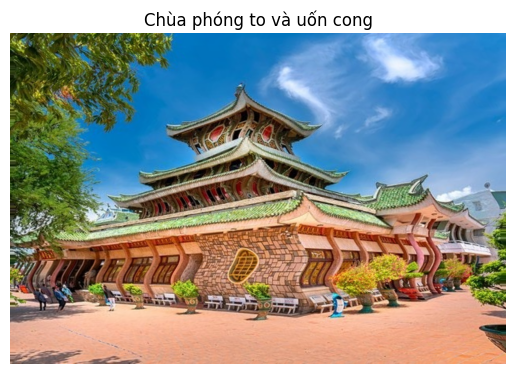

In [ ]:
import numpy as np
from PIL import Image
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt


pagoda = np.array(Image.open('chua.jpg').convert('RGB'))
pagoda_zoomed = np.array(Image.fromarray(pagoda).resize((pagoda.shape[1]*5, pagoda.shape[0]*5), resample=Image.BICUBIC))


h, w, _ = pagoda_zoomed.shape
yy, xx = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')


warp_strength = 30
warp_frequency = 2 * np.pi / 300
xx_new = xx + warp_strength * np.sin(warp_frequency * yy)


xx_new = np.clip(xx_new, 0, w - 1)


warped = np.zeros_like(pagoda_zoomed)
for i in range(3):  # RGB
    warped[..., i] = map_coordinates(pagoda_zoomed[..., i], [yy, xx_new], order=1, mode='reflect')


Image.fromarray(warped).save('pagoda_warped.jpg')


plt.imshow(warped)
plt.axis('off')
plt.title('Chùa phóng to và uốn cong')
plt.show()


Chọn ảnh:
1: chua.jpg
2: kiwi.jpg
3: dua_hau.jpg

Chọn phép biến đổi:
1: Tịnh tiến
2: Xoay
3: Phóng to / Thu nhỏ
4: Làm mờ Gaussian
5: Biến đổi sóng


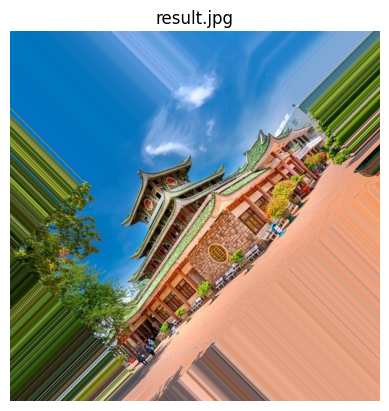

In [ ]:
import numpy as np
from PIL import Image
from scipy.ndimage import rotate, zoom, gaussian_filter, map_coordinates
import matplotlib.pyplot as plt


img_paths = {
    '1': 'chua.jpg',
    '2': 'kiwi.jpg',
    '3': 'dua_hau.jpg'
}

def show_and_save(img, name='result.jpg'):
    Image.fromarray(img).save(name)
    plt.imshow(img)
    plt.axis('off')
    plt.title(name)
    plt.show()

def translate_image(img, dx, dy):
    translated = np.zeros_like(img)
    h, w = img.shape[:2]
    translated[max(0, dy):h, max(0, dx):w] = img[0:h - dy, 0:w - dx]
    return translated

def rotate_image(img, angle, reshape):
    return rotate(img, angle=angle, reshape=reshape, mode='nearest').astype(np.uint8)

def zoom_image(img, factor):
    return zoom(img, (factor, factor, 1), order=1).astype(np.uint8)

def blur_image(img, sigma):
    return gaussian_filter(img, sigma=(sigma, sigma, 0)).astype(np.uint8)

def wave_transform(img, amplitude):
    h, w, _ = img.shape
    yy, xx = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')
    xx_wave = xx + amplitude * np.sin(2 * np.pi * yy / 50)
    xx_wave = np.clip(xx_wave, 0, w - 1)
    result = np.zeros_like(img)
    for i in range(3):
        result[..., i] = map_coordinates(img[..., i], [yy, xx_wave], order=1, mode='reflect')
    return result.astype(np.uint8)

def main():
    print("Chọn ảnh:")
    for k, v in img_paths.items():
        print(f"{k}: {v}")
    img_choice = input("Nhập số (1-3): ").strip()
    
    if img_choice not in img_paths:
        print("Ảnh không hợp lệ.")
        return

    img = np.array(Image.open(img_paths[img_choice]).convert('RGB'))

    print("\nChọn phép biến đổi:")
    print("1: Tịnh tiến")
    print("2: Xoay")
    print("3: Phóng to / Thu nhỏ")
    print("4: Làm mờ Gaussian")
    print("5: Biến đổi sóng")
    choice = input("Nhập số (1-5): ").strip()

    if choice == '1':
        dx = int(input("Số pixel tịnh tiến theo trục x: "))
        dy = int(input("Số pixel tịnh tiến theo trục y: "))
        result = translate_image(img, dx, dy)

    elif choice == '2':
        angle = float(input("Nhập góc xoay (độ): "))
        reshape = input("reshape=True? (y/n): ").strip().lower() == 'y'
        result = rotate_image(img, angle, reshape)

    elif choice == '3':
        factor = float(input("Nhập hệ số zoom (>1 phóng to, <1 thu nhỏ): "))
        result = zoom_image(img, factor)

    elif choice == '4':
        sigma = float(input("Nhập giá trị sigma cho Gaussian blur: "))
        result = blur_image(img, sigma)

    elif choice == '5':
        amp = float(input("Nhập biên độ sóng (amplitude): "))
        result = wave_transform(img, amp)

    else:
        print("Lựa chọn không hợp lệ.")
        return

    show_and_save(result, 'result.jpg')

if __name__ == '__main__':
    main()
